# Handwriting Rating

In [1]:
import torch

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


In [2]:
# Set device to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Getting the dataset

In [3]:
# Download training data locally
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

# Download testing data locally
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
# Create a list of class names
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
# See information from random sample from dataset
print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: 5 - five


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

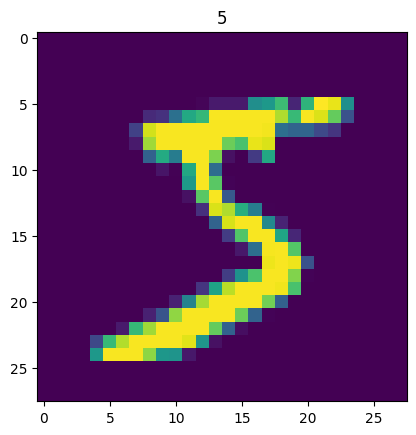

In [9]:
# Visualize color sample from dataset
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

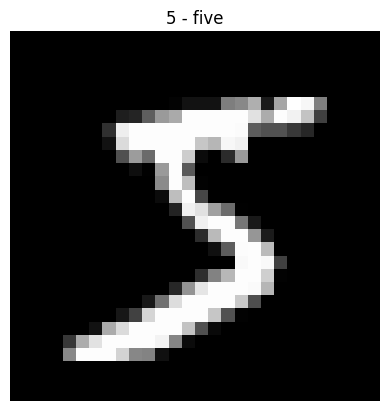

In [10]:
# Visualize a grayscale sample from dataset
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")

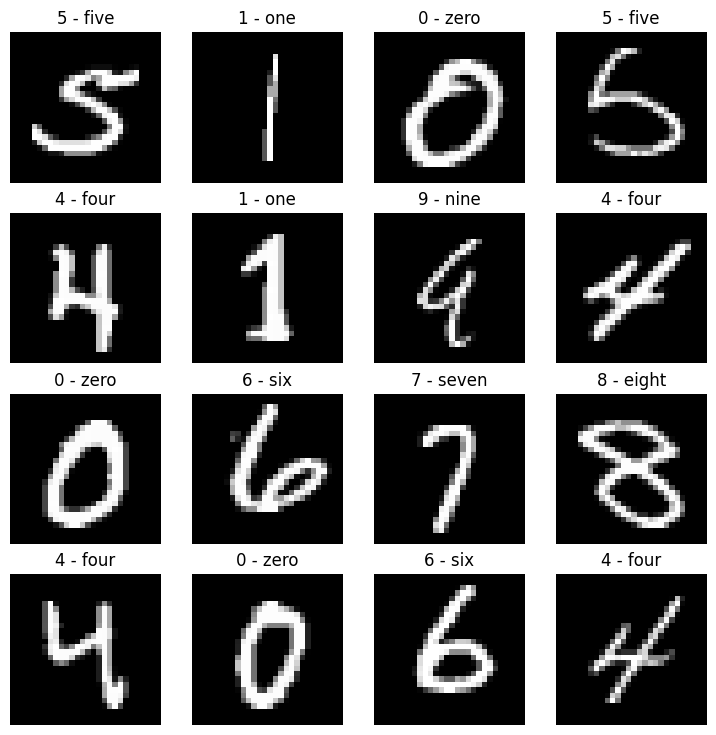

In [11]:
# Visualize a random sample from dataset
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

## 2. DataLoader

In [12]:
from torch.utils.data import DataLoader

In [13]:
# Set hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = 0

# Train dataloader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS)

# Test dataloder
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS)

In [14]:
# Dataloader information
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
# Sample the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1


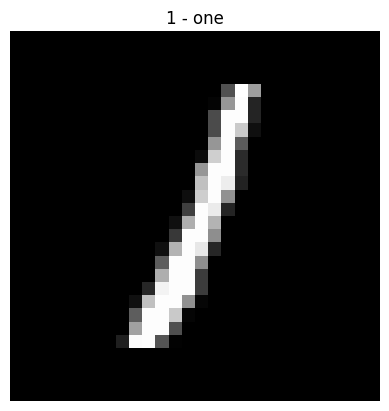

In [16]:
# Print random sample from batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"Label: {label}")

# 3. Models

### 3.1 Model 1

Simple model with only linear layers

In [17]:
from torch import nn
from torchinfo import summary

In [18]:
class MNISTModelv1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
# Initiate model_!
model_1 = MNISTModelv1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [20]:
# Visualize model_1
summary(model_1, input_size=[1, 1, 28, 28])

Layer (type:depth-idx)                   Output Shape              Param #
MNISTModelv1                             [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Flatten: 2-1                      [1, 784]                  --
│    └─Linear: 2-2                       [1, 10]                   7,850
│    └─Linear: 2-3                       [1, 10]                   110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04

### 3.2 Model 2

More complex model based on the TinyVGG architecture

In [21]:
class MNISTModelv2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [22]:
# Initiate model_2
model_2 = MNISTModelv2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [23]:
# Visualize model_2
summary(model_2, input_size=[1, 1, 28, 28])

Layer (type:depth-idx)                   Output Shape              Param #
MNISTModelv2                             [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 12, 12]           --
│    └─Conv2d: 2-1                       [1, 10, 26, 26]           100
│    └─ReLU: 2-2                         [1, 10, 26, 26]           --
│    └─Conv2d: 2-3                       [1, 10, 24, 24]           910
│    └─ReLU: 2-4                         [1, 10, 24, 24]           --
│    └─MaxPool2d: 2-5                    [1, 10, 12, 12]           --
├─Sequential: 1-2                        [1, 10, 4, 4]             --
│    └─Conv2d: 2-6                       [1, 10, 10, 10]           910
│    └─ReLU: 2-7                         [1, 10, 10, 10]           --
│    └─Conv2d: 2-8                       [1, 10, 8, 8]             910
│    └─ReLU: 2-9                         [1, 10, 8, 8]             --
│    └─MaxPool2d: 2-10                   [1, 10, 4, 4]             --
├─Sequentia

### 3.3 Model 3

Even more complex model based on the VGG16 architecture

In [24]:
class MNISTModelv3(nn.Module):
    def __init__(self,
                 input_shape: int,
                 output_shape: int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=64, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, 
                      out_channels=64, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, 
                      out_channels=128, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, 
                      out_channels=128, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2),
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, 
                      out_channels=256, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, 
                      out_channels=256, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*3*3, 
                      out_features=4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=4096, 
                      out_features=4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=4096, 
                      out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))
        return x

In [25]:
# Initiate model_3
model_3 = MNISTModelv3(
    input_shape=1,
    output_shape=len(class_names)
).to(device)

In [26]:
# Visualize model_3
summary(model_3, input_size=[1, 1, 28, 28])

Layer (type:depth-idx)                   Output Shape              Param #
MNISTModelv3                             [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 64, 28, 28]           640
│    └─ReLU: 2-2                         [1, 64, 28, 28]           --
│    └─Conv2d: 2-3                       [1, 64, 28, 28]           36,928
│    └─ReLU: 2-4                         [1, 64, 28, 28]           --
│    └─MaxPool2d: 2-5                    [1, 64, 14, 14]           --
├─Sequential: 1-2                        [1, 128, 7, 7]            --
│    └─Conv2d: 2-6                       [1, 128, 14, 14]          73,856
│    └─ReLU: 2-7                         [1, 128, 14, 14]          --
│    └─Conv2d: 2-8                       [1, 128, 14, 14]          147,584
│    └─ReLU: 2-9                         [1, 128, 14, 14]          --
│    └─MaxPool2d: 2-10                   [1, 128, 7, 7]            --
├

## 4. Model evaluation functions and setup

### 4.1 Loss, Optimizer, and Evaluation metrics

In [27]:
from typing import Tuple, Dict, List
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [28]:
# Create accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct/len(y_pred)) * 100
    return accuracy

In [29]:
# Setup loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizers
optimizer_1 = torch.optim.SGD(params = model_1.parameters(),
                               lr=0.01)
optimizer_2 = torch.optim.SGD(params = model_2.parameters(),
                               lr=0.01)
optimizer_3 = torch.optim.SGD(params = model_3.parameters(),
                               lr=0.01)

### 4.2 Create functions

In [30]:
# Create train_step() function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # Switches the model to train mode
    model.train()
    
    # Initialize variables to store total training loss and accuracy
    train_loss, train_acc = 0, 0
    
    # Loop over batches from the DataLoader
    for batch, (X, y) in enumerate(dataloader):
        
        # Send batch of images and labels to the computation device (CPU/GPU)
        X, y = X.to(device), y.to(device)
        
        # Perform a forward pass through the model to get the predictions
        y_pred = model(X)
        
        # Calculate the loss between the predictions and actual values
        loss = loss_fn(y_pred, y)
        # Add up the loss values
        train_loss += loss.item()
        
        # Reset the gradients from the previous iteration
        optimizer.zero_grad()
        
        # Perform backward propagation to calculate gradients
        loss.backward()
        
        # Perform a step of optimization
        optimizer.step()
        
        # Get the predicted class by taking the maximum probability from the softmax output
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        
        # Calculate accuracy by comparing predicted class to actual class, and add up for all instances
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
        
    train_loss = train_loss / len(dataloader) # Calculate average training loss
    train_acc = train_acc / len(dataloader) # Calculate average training accuracy
    return train_loss, train_acc # Return average training loss and accuracy

In [31]:
# Create test_step() function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    
    # Switches the model to evaluation mode
    model.eval()
    
    # Initialize variables to store total test loss and accuracy
    test_loss, test_acc = 0, 0
    
    # Disable calculation of gradients for performance boost during inference
    with torch.inference_mode():
        
        # Loop over batches from the DataLoader
        for batch, (X, y) in enumerate(dataloader):
            
            # Send batch of images and labels to the computation device (CPU/GPU)
            X, y = X.to(device), y.to(device)
            
            # Perform a forward pass through the model to get the predictions
            test_pred_logits = model(X)
            
            # Calculate the loss between the predictions and actual values
            loss = loss_fn(test_pred_logits, y)
            # Add up the loss values
            test_loss += loss.item()
            
            # Get the predicted class by taking the index of the maximum logit
            test_pred_labels = test_pred_logits.argmax(dim=1)
            # Calculate accuracy by comparing predicted class to actual class, and add up for all instances
            test_acc += ((test_pred_labels==y).sum().item()/len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader) # Calculate average test loss
    test_acc = test_acc / len(dataloader) # Calculate average test accuracy
    return test_loss, test_acc # Return average test loss and accuracy

In [32]:
# Create train() function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    
    # Initialize a dictionary to store training and validation losses and accuracies for each epoch
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    # Establish the start time for training
    start_time = timer()
    
    # Loop over epochs
    for epoch in tqdm(range(epochs)):
        # Execute a training step and get training loss and accuracy
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        # Execute a testing step and get testing loss and accuracy
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        
        # Print losses and accuracies for this epoch
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
        
        # Append losses and accuracies to results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # Establish the end time for training
    end_time = timer()
    
    return results, (end_time-start_time)

In [33]:
# Create plot_loss_curves() function
def plot_loss_curves(results: Dict[str, List[float]]):
    # Extract training and validation losses and accuracies from results dictionary
    loss = results["train_loss"]
    test_loss = results["test_loss"]  
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    # Number of epochs is the length of any list in results
    epochs = range(len(results["train_loss"]))
    
    # Set figure size
    plt.figure(figsize=(15, 7))
    
    # Subplot for loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Subplot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [34]:
# Create eval_model() function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc= 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

## 5 Model evaluation

In [35]:
# Set hyperparameters
NUM_EPOCHS = 20

### 5.1 Model 1 evaluation

In [36]:
# Train model 1
model_1_results, model_1_time = train(model=model_1,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer_1,
                                      loss_fn=loss_fn,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.8458 | Train acc: 0.7829 | Test loss: 0.4228 | Test acc: 0.8857
Epoch: 1 | Train loss: 0.3955 | Train acc: 0.8902 | Test loss: 0.3499 | Test acc: 0.9008
Epoch: 2 | Train loss: 0.3518 | Train acc: 0.9003 | Test loss: 0.3277 | Test acc: 0.9075
Epoch: 3 | Train loss: 0.3323 | Train acc: 0.9063 | Test loss: 0.3151 | Test acc: 0.9115
Epoch: 4 | Train loss: 0.3204 | Train acc: 0.9096 | Test loss: 0.3077 | Test acc: 0.9137
Epoch: 5 | Train loss: 0.3117 | Train acc: 0.9126 | Test loss: 0.2999 | Test acc: 0.9157
Epoch: 6 | Train loss: 0.3047 | Train acc: 0.9148 | Test loss: 0.2937 | Test acc: 0.9174
Epoch: 7 | Train loss: 0.2985 | Train acc: 0.9163 | Test loss: 0.2902 | Test acc: 0.9183
Epoch: 8 | Train loss: 0.2932 | Train acc: 0.9183 | Test loss: 0.2861 | Test acc: 0.9193
Epoch: 9 | Train loss: 0.2887 | Train acc: 0.9194 | Test loss: 0.2818 | Test acc: 0.9207
Epoch: 10 | Train loss: 0.2847 | Train acc: 0.9201 | Test loss: 0.2804 | Test acc: 0.9204
Epoch: 11 | Train lo

In [37]:
# Evaluate final metrics for model 1
model_1_final_results = eval_model(model=model_1,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device)

# Display final results for model 1
model_1_final_results

{'model_name': 'MNISTModelv1',
 'model_loss': 0.27148085832595825,
 'model_acc': 92.3023162939297}

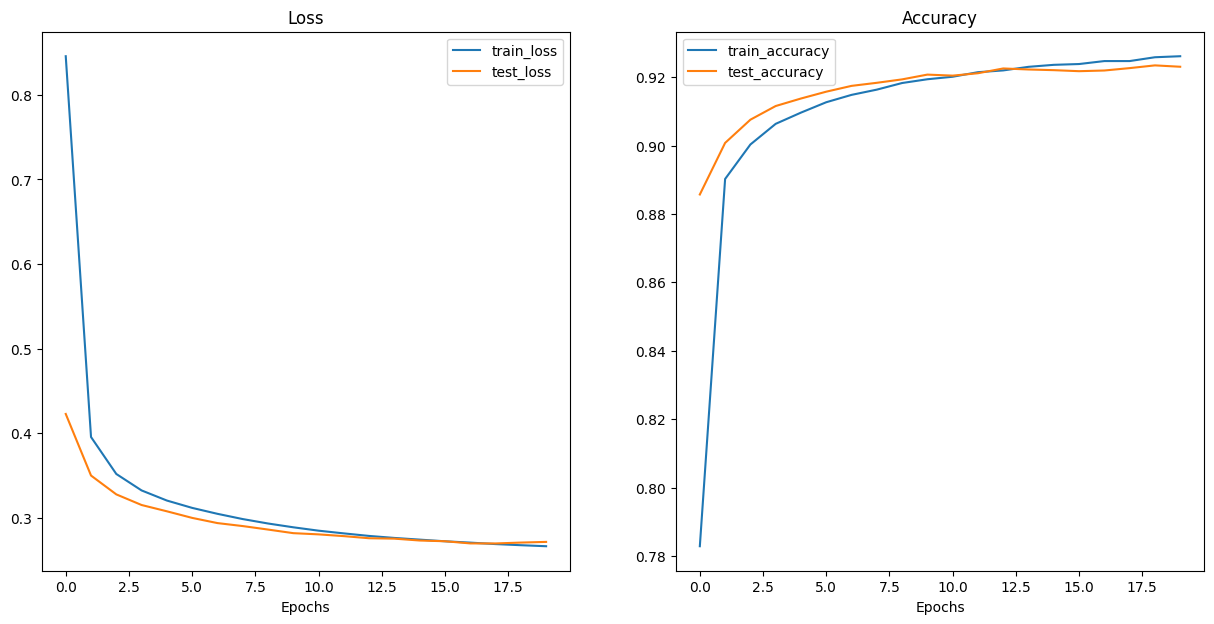

In [38]:
# Plot loss and accuracy curves
plot_loss_curves(model_1_results)

### 5.2 Model 2 evaluation

In [39]:
# Train model 2
model_2_results, model_2_time = train(model=model_2,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer_2,
                                      loss_fn=loss_fn,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1534 | Train acc: 0.6042 | Test loss: 0.2094 | Test acc: 0.9382
Epoch: 1 | Train loss: 0.1634 | Train acc: 0.9497 | Test loss: 0.1121 | Test acc: 0.9652
Epoch: 2 | Train loss: 0.1173 | Train acc: 0.9633 | Test loss: 0.0898 | Test acc: 0.9713
Epoch: 3 | Train loss: 0.1003 | Train acc: 0.9691 | Test loss: 0.0808 | Test acc: 0.9733
Epoch: 4 | Train loss: 0.0900 | Train acc: 0.9722 | Test loss: 0.0781 | Test acc: 0.9740
Epoch: 5 | Train loss: 0.0829 | Train acc: 0.9741 | Test loss: 0.0810 | Test acc: 0.9740
Epoch: 6 | Train loss: 0.0769 | Train acc: 0.9759 | Test loss: 0.0719 | Test acc: 0.9776
Epoch: 7 | Train loss: 0.0728 | Train acc: 0.9775 | Test loss: 0.0634 | Test acc: 0.9794
Epoch: 8 | Train loss: 0.0687 | Train acc: 0.9786 | Test loss: 0.0605 | Test acc: 0.9810
Epoch: 9 | Train loss: 0.0657 | Train acc: 0.9800 | Test loss: 0.0629 | Test acc: 0.9792
Epoch: 10 | Train loss: 0.0622 | Train acc: 0.9808 | Test loss: 0.0611 | Test acc: 0.9789
Epoch: 11 | Train lo

In [40]:
# Evaluate final metrics for model 2
model_2_final_results = eval_model(model=model_2,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device)

# Display final results for model 2
model_2_final_results

{'model_name': 'MNISTModelv2',
 'model_loss': 0.05204678326845169,
 'model_acc': 98.30271565495208}

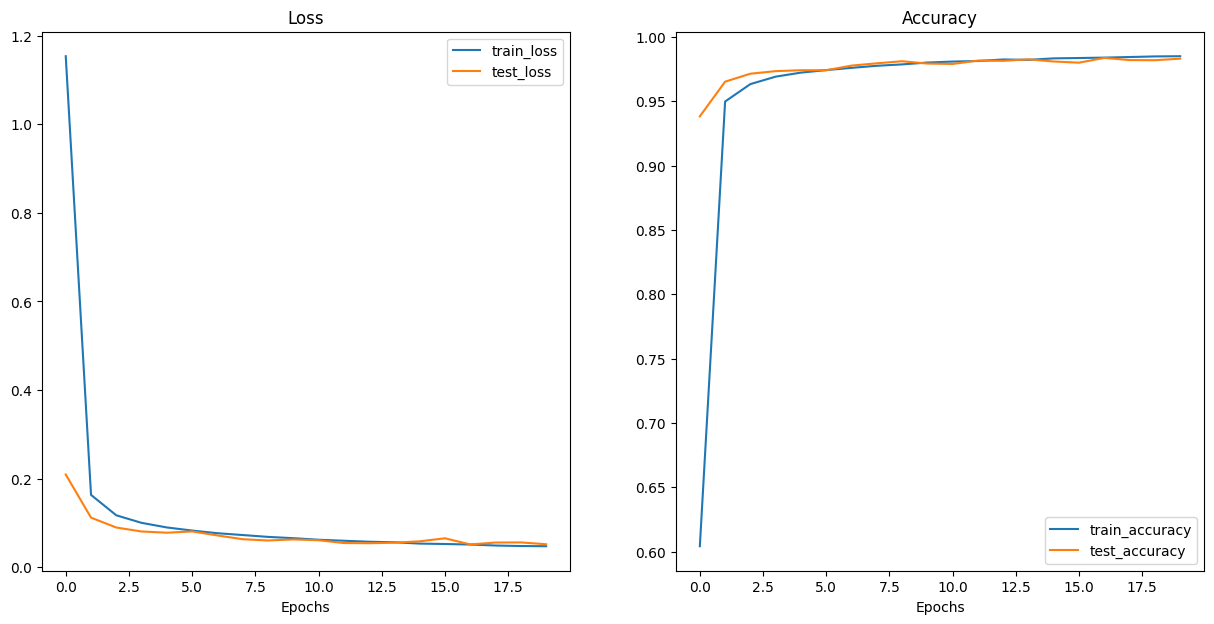

In [41]:
# Plot loss and accuracy curves
plot_loss_curves(model_2_results)

### 5.3 Model 3 evaluation

In [42]:
# Train model 3
model_3_results, model_3_time = train(model=model_3,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer_3,
                                      loss_fn=loss_fn,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 2.3013 | Train acc: 0.1116 | Test loss: 2.3004 | Test acc: 0.1135
Epoch: 1 | Train loss: 2.2994 | Train acc: 0.1124 | Test loss: 2.2951 | Test acc: 0.1135
Epoch: 2 | Train loss: 1.4283 | Train acc: 0.5036 | Test loss: 0.1849 | Test acc: 0.9393
Epoch: 3 | Train loss: 0.1577 | Train acc: 0.9506 | Test loss: 0.0814 | Test acc: 0.9725
Epoch: 4 | Train loss: 0.0949 | Train acc: 0.9696 | Test loss: 0.0593 | Test acc: 0.9812
Epoch: 5 | Train loss: 0.0710 | Train acc: 0.9778 | Test loss: 0.0541 | Test acc: 0.9818
Epoch: 6 | Train loss: 0.0563 | Train acc: 0.9825 | Test loss: 0.0459 | Test acc: 0.9851
Epoch: 7 | Train loss: 0.0494 | Train acc: 0.9848 | Test loss: 0.0403 | Test acc: 0.9867
Epoch: 8 | Train loss: 0.0412 | Train acc: 0.9868 | Test loss: 0.0411 | Test acc: 0.9866
Epoch: 9 | Train loss: 0.0364 | Train acc: 0.9884 | Test loss: 0.0418 | Test acc: 0.9860
Epoch: 10 | Train loss: 0.0321 | Train acc: 0.9898 | Test loss: 0.0383 | Test acc: 0.9880
Epoch: 11 | Train lo

In [43]:
# Evaluate final metrics for model 3
model_3_final_results = eval_model(model=model_3,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn,
                                   device=device)

# Display final results for model 3
model_3_final_results

{'model_name': 'MNISTModelv3',
 'model_loss': 0.037253785878419876,
 'model_acc': 98.95167731629392}

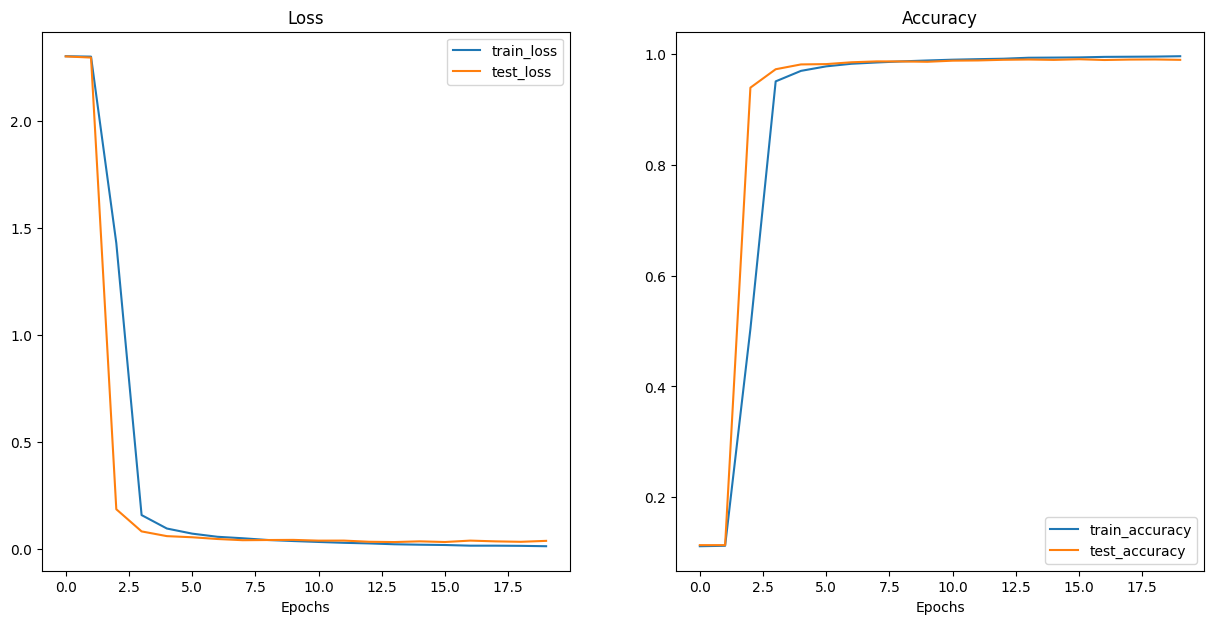

In [44]:
# Plot loss and accuracy curves
plot_loss_curves(model_3_results)

### 5.4 Compare results

In [45]:
import pandas as pd

In [46]:
# Combine results into a single dataframe
compare_results = pd.DataFrame([model_1_final_results,
                               model_2_final_results,
                               model_3_final_results])

# Add training time to dataframe
compare_results["training_time"] = [model_1_time,
                                    model_2_time,
                                    model_3_time]

# Print results dataframe
compare_results

,model_name,model_loss,model_acc,training_time
0,MNISTModelv1,0.271481,92.302316,163.590406
1,MNISTModelv2,0.052047,98.302716,197.810955
2,MNISTModelv3,0.037254,98.951677,288.939552


Text(0.5, 1.0, 'Model Training Time')

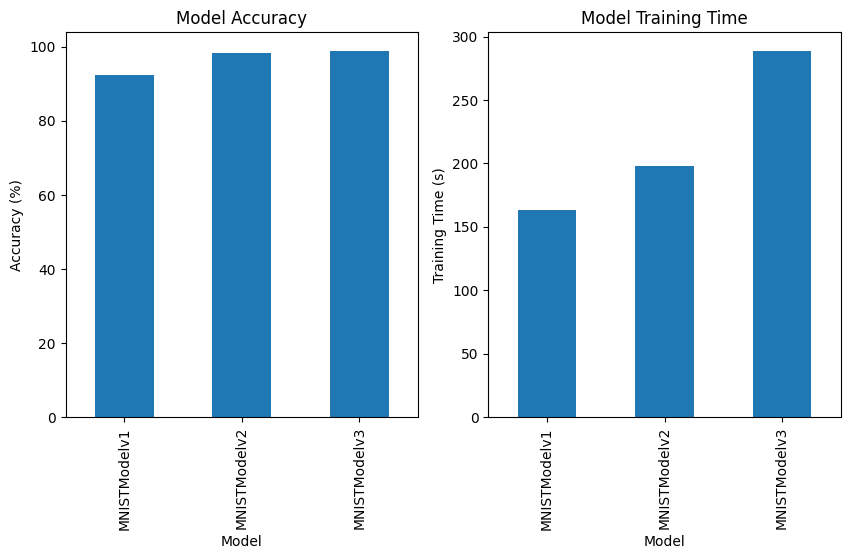

In [47]:
# Visualize results
plt.figure(figsize=(10,5))

# Create accuracy subplot
plt.subplot(1, 2, 1)
compare_results.set_index("model_name")["model_acc"].plot(kind='bar')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy")

# Create training time subplot
plt.subplot(1, 2, 2)
compare_results.set_index("model_name")["training_time"].plot(kind='bar')
plt.xlabel("Model")
plt.ylabel("Training Time (s)")
plt.title("Model Training Time")

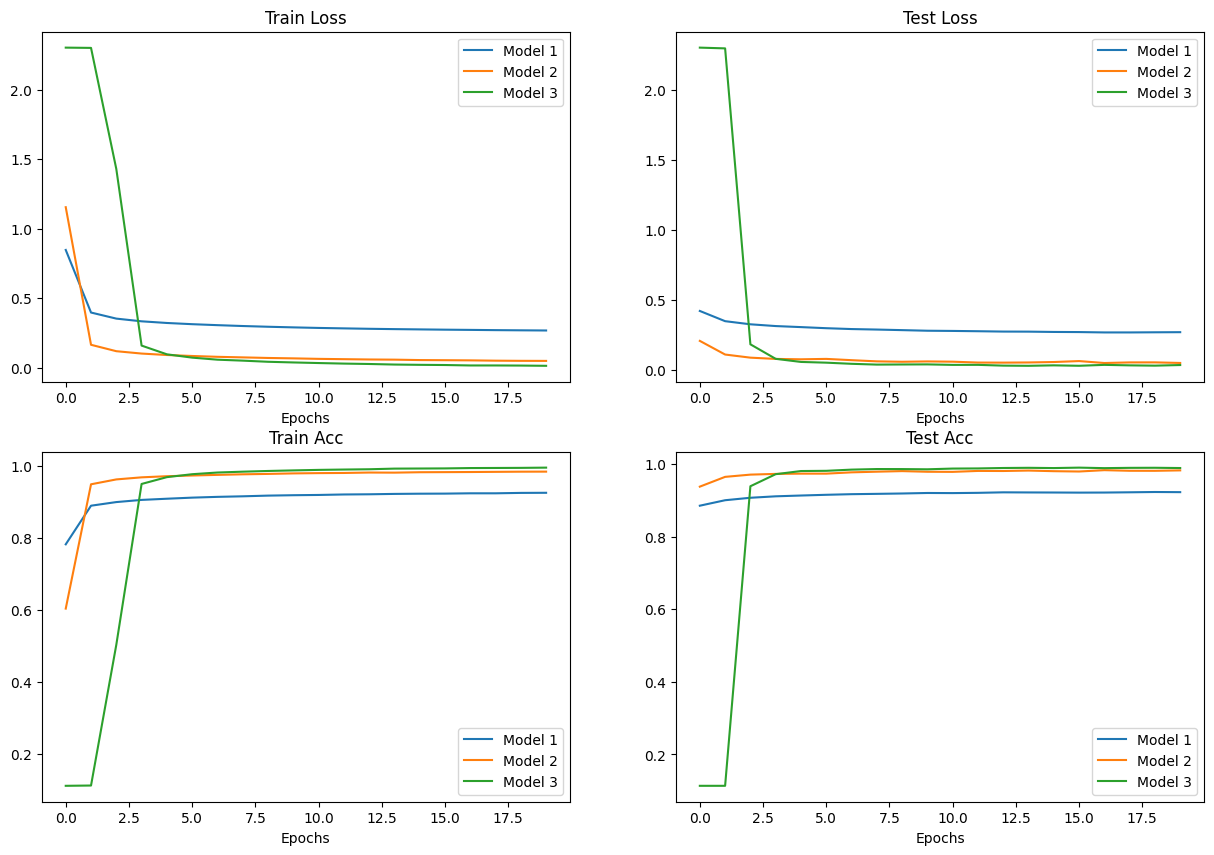

In [48]:
# Setup a plot
plt.figure(figsize=(15,10))

# Get number of epochs
epochs = range(len(model_1_results["train_loss"]))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_1_results["train_loss"], label="Model 1")
plt.plot(epochs, model_2_results["train_loss"], label="Model 2")
plt.plot(epochs, model_3_results["train_loss"], label="Model 3")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_1_results["test_loss"], label="Model 1")
plt.plot(epochs, model_2_results["test_loss"], label="Model 2")
plt.plot(epochs, model_3_results["test_loss"], label="Model 3")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_1_results["train_acc"], label="Model 1")
plt.plot(epochs, model_2_results["train_acc"], label="Model 2")
plt.plot(epochs, model_3_results["train_acc"], label="Model 3")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

# Plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_1_results["test_acc"], label="Model 1")
plt.plot(epochs, model_2_results["test_acc"], label="Model 2")
plt.plot(epochs, model_3_results["test_acc"], label="Model 3")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend()

# 6. Making predictions using the best model

## 6.1 Create custom functions

In [49]:
import random
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

C:\Users\clopt\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [50]:
def predict_label(model, img, device):
    """predicts the label based on a model, image, and device"""
    img = img.unsqueeze(dim=1).to(device)
    with torch.inference_mode():
        pred_label = torch.softmax(model(img), dim=1).argmax().item()
    return pred_label

In [51]:
def plot_img(img, pred_label, truth_label):
    """plots the image, its predicted label, and actual label"""
    plt.imshow(img.squeeze(), cmap="gray")
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    title_color = "g" if pred_label == truth_label else "r"
    plt.title(title_text, fontsize=10, color=title_color)
    plt.axis(False)

In [52]:
def plot_images_in_grid(images, pred_labels, true_labels, nrows=3, ncols=3):
    """Plot images in a grid pattern based on row/column input. Does not allow 1x1 grid."""
    fig, axs = plt.subplots(nrows, ncols, figsize=(9,9))
    # If we have only 1 row or column, make sure axs is a 2D array for consistent handling
    axs = np.array(axs).reshape(nrows, ncols)
    for i, ax in enumerate(axs.flatten()):
        if i < len(images):  # Make sure we don't go out of bounds
            img = images[i].squeeze()
            pred_label = pred_labels[i]
            truth_label = true_labels[i]
            ax.imshow(img, cmap="gray")
            title_text = f"Pred: {pred_label} | Truth: {truth_label}"
            title_color = "g" if pred_label == truth_label else "r"
            ax.set_title(title_text, fontsize=10, color=title_color)
        ax.axis(False)
    plt.tight_layout()

In [53]:
def create_confusion_matrix(y_true_tensor, y_pred_tensor, class_names):
    """Create a confusion matrix"""
    confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
    confmat_tensor = confmat(preds=y_pred_tensor, target=y_true_tensor)
    
    # Plot the confusion matrix
    fig, ax = plot_confusion_matrix(
        conf_mat=confmat_tensor.numpy(),
        class_names=class_names,
        figsize=(10,7)
    )
    return confmat_tensor.numpy()

In [54]:
def make_predictions(model, dataloader, device):
    """Make predictions using models, data, and device on a dataset using a dataloader"""
    y_true = []
    y_preds = []
    image_list = []
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Making predictions..."):
            X, y = X.to(device), y.to(device)
            image_list.append(X.cpu())
            y_logit = model(X)
            y_true.append(y.cpu())
            y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
            y_preds.append(y_pred.cpu())
        image_list_tensor = torch.cat(image_list)
        y_true_tensor = torch.cat(y_true)
        y_pred_tensor = torch.cat(y_preds)
    
    return y_true_tensor, y_pred_tensor, image_list_tensor

In [55]:
def accuracy_chart(confmat):
    # calculate accuracy for each label
    label_acc = confmat.diagonal()/confmat.sum(axis=1)
    label_acc = np.nan_to_num(label_acc) # in case of NaN or Inf, replace them by 0

    # Sort labels by accuracy
    sorted_indices = np.argsort(label_acc)
    sorted_label_acc = label_acc[sorted_indices]

    # Get label names (replace with actual label names)
    labels = [f"{i}" for i in range(len(label_acc))]

    # Sort label names according to accuracy
    sorted_labels = [labels[i] for i in sorted_indices]

    # Create the bar chart
    plt.figure(figsize=(12,6))
    plt.barh(sorted_labels, sorted_label_acc * 100) # multiply by 100 to get percentage
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Labels')
    plt.title('Accuracy of Each Label')
    plt.xlim([0, 100])
    plt.show()

### 6.2 Predict on custom dataset

In [56]:
# Make predictions
y_true_tensor_mnist, y_pred_tensor_mnist, image_list_tensor_mnist = make_predictions(model_3, 
                                                                                     test_dataloader,
                                                                                     device)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

### 6.3 Visualize results

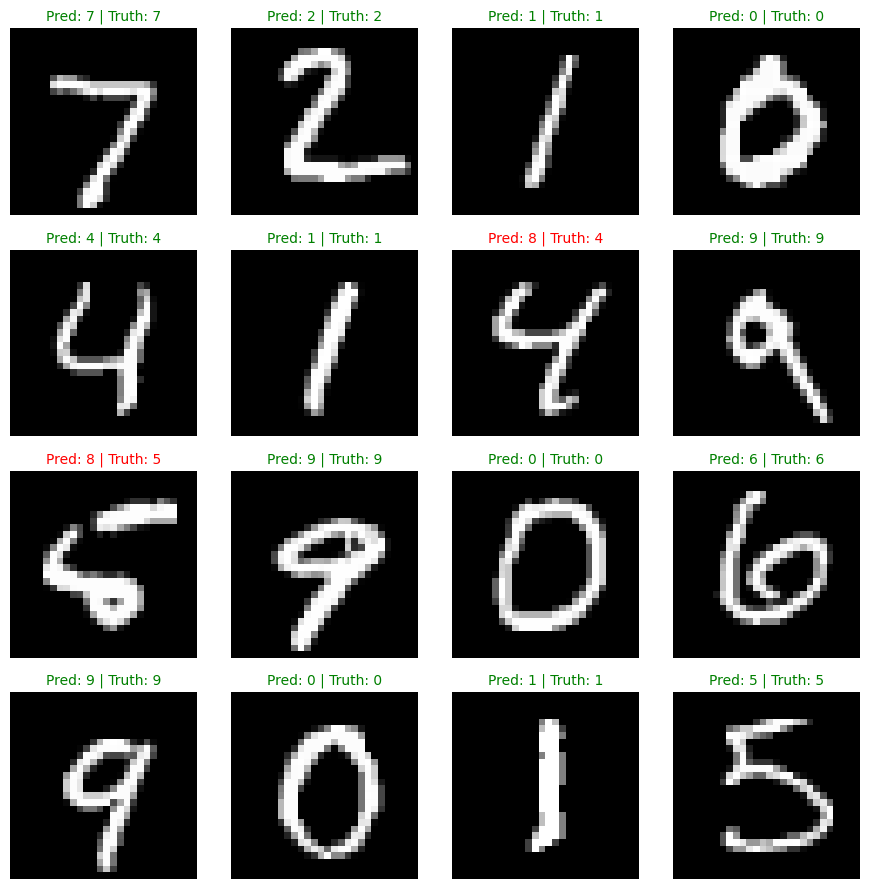

In [57]:
# Establish parameters for image grids
NROWS = 4
NCOLS = 4

# Plot images from MNIST dataset
plot_images_in_grid(image_list_tensor_mnist,
                    y_pred_tensor_mnist,
                    y_true_tensor_mnist, 
                    NROWS,
                    NCOLS)

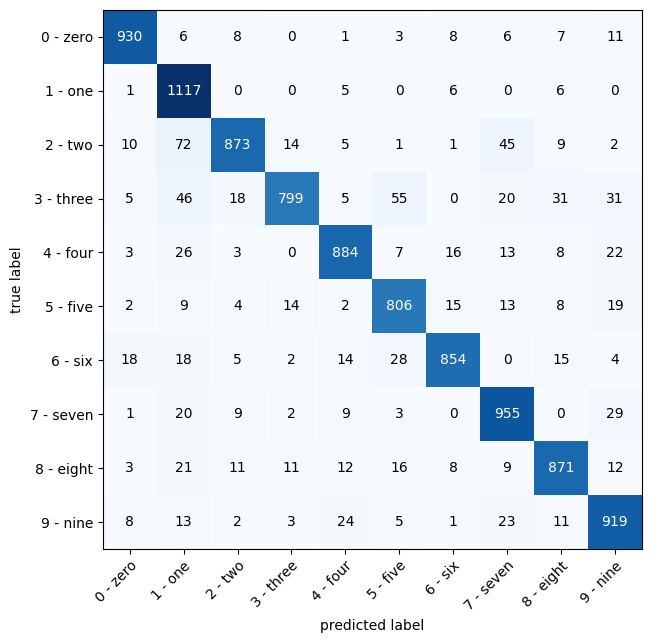

In [58]:
# Create confusion matrix from model_3 on MNIST data
confmat_mnist = create_confusion_matrix(y_true_tensor_mnist, 
                                        y_pred_tensor_mnist, 
                                        class_names)

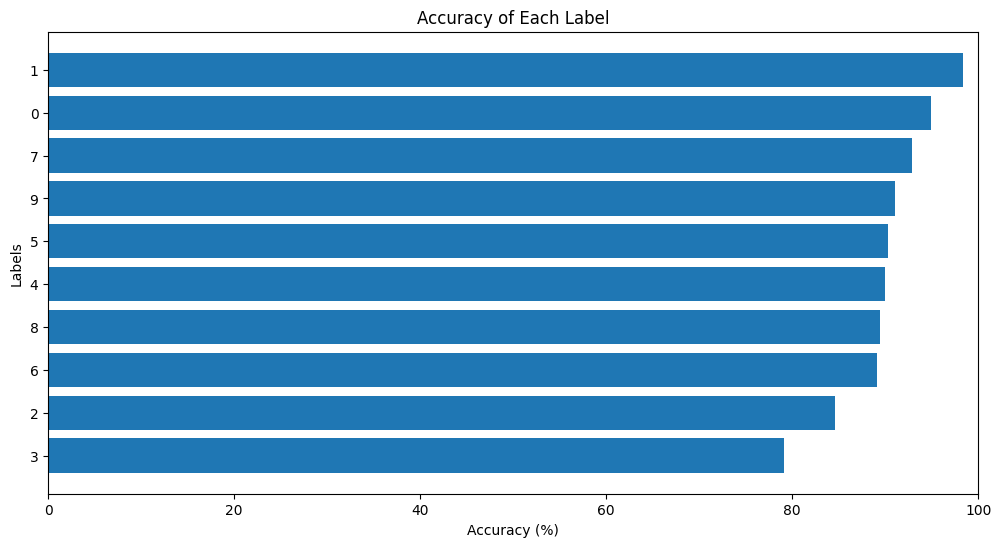

In [59]:
# Create a bar chart showing accuracy rates
accuracy_chart(confmat_mnist)

# 7. Save and load model

### 7.1 Save the best model

In [60]:
from pathlib import Path

In [61]:
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\model_3.pth


### 7.2 Load the best model

In [62]:
# Create new instance
loaded_model_3 = MNISTModelv3(input_shape=1,
                              output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to the target device
loaded_model_3.to(device)

MNISTModelv3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): L

## 8. Predict on custom dataset

In [63]:
from torch.utils.data import Dataset
import pathlib
from PIL import Image
import os

### 8.1 Create custom functions

In [64]:
class ImageFolderCustom(Dataset):
    # Initialize custom dataset
    def __init__(self, target_dir: str, transform=None):
        # Get all of the image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    # Create a function to load image
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # Overwrite __len()__
    def __len__(self) -> int:
        "Returns the total number of samples"
        return len(self.paths)
    
    # Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return untransformed image and label

In [65]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    # Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    
    return classes, class_to_idx

In [66]:
# Create method for inverting tensors as they are transformed
class Inversion(object):
    def __call__(self, tensor):
        return 1 - tensor

### 8.2 Import custom dataset

In [67]:
# Set transforms for incoming data
test_transforms = transforms.Compose([transforms.Resize(size=(28,28)),
                                      transforms.Grayscale(),
                                      transforms.ToTensor(),
                                      Inversion()]) # Inversion() is my custom method

In [68]:
# Set directory for custom testing data
custom_dir = "custom_data"

test_data_custom = ImageFolderCustom(target_dir=custom_dir,
                                    transform=test_transforms)

In [69]:
# This code errors out when over 0 NUM_WORKERS are used - investigate later
NUM_WORKERS = 0

# Create dataloader for custom data
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=True)

### 8.3 Predict on custom dataset

In [70]:
# Make predictions on custom dataset
y_true_tensor_custom, y_pred_tensor_custom, image_list_tensor_custom = make_predictions(model_3, 
                                                                                        test_dataloader_custom, 
                                                                                        device)

Making predictions...:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
# Evaluate custom data metrics for model 3
custom_data__results = eval_model(model=model_3,
                                  data_loader=test_dataloader_custom,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

# Display custom data results for model 3
print(f"Using {custom_data__results['model_name']} on my custom data, the accuracy is {custom_data__results['model_acc']:.2f}%")

Using MNISTModelv3 on my custom data, the accuracy is 75.56%


### 8.4 Visualize results

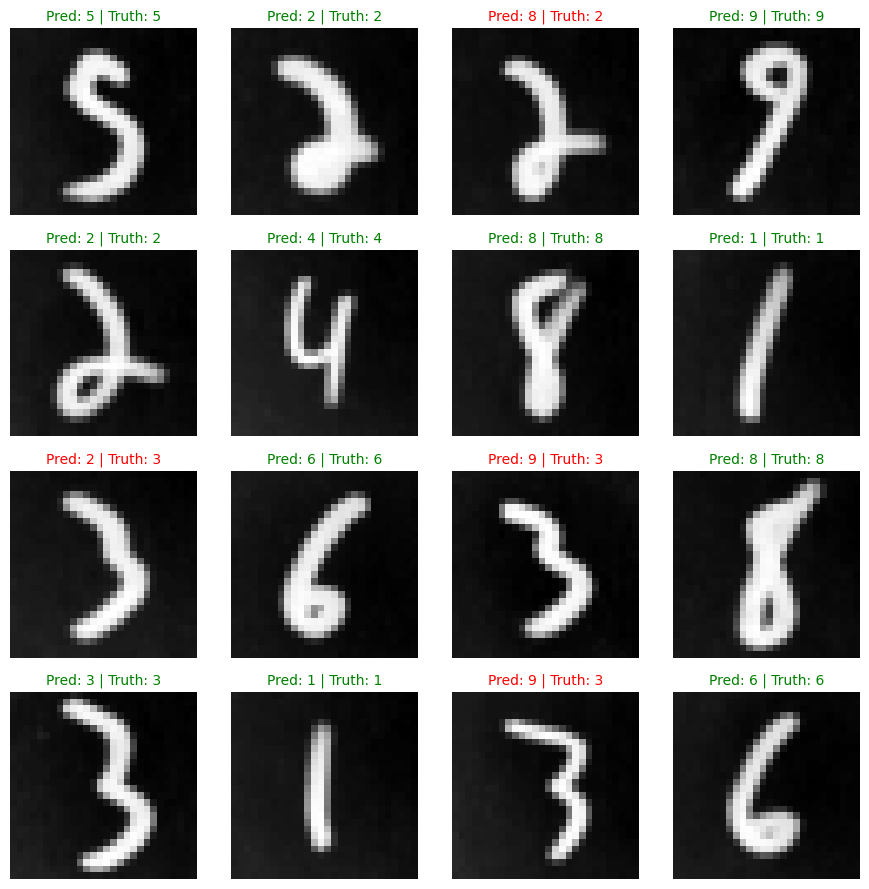

In [72]:
# Plot images with prediction/truth values
plot_images_in_grid(image_list_tensor_custom, 
                    y_pred_tensor_custom, 
                    y_true_tensor_custom, 
                    NROWS, 
                    NCOLS)

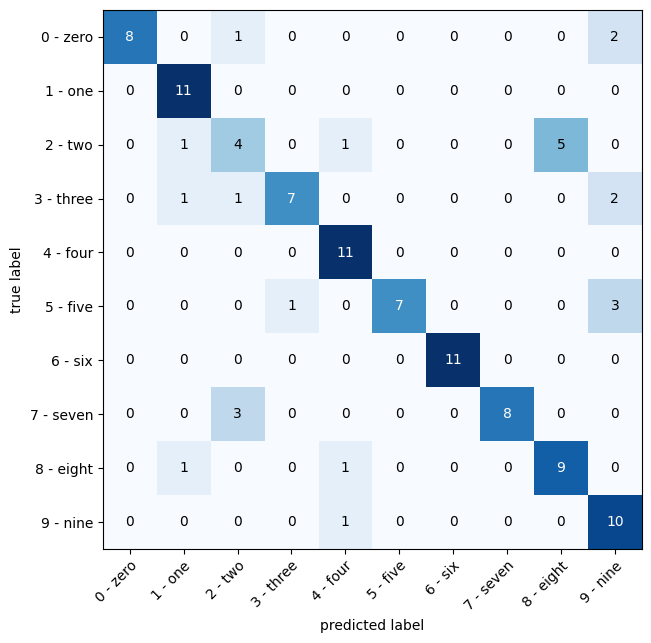

In [73]:
# Create confusion matrix 
confmat_custom = create_confusion_matrix(y_true_tensor_custom, 
                                         y_pred_tensor_custom, 
                                         class_names)

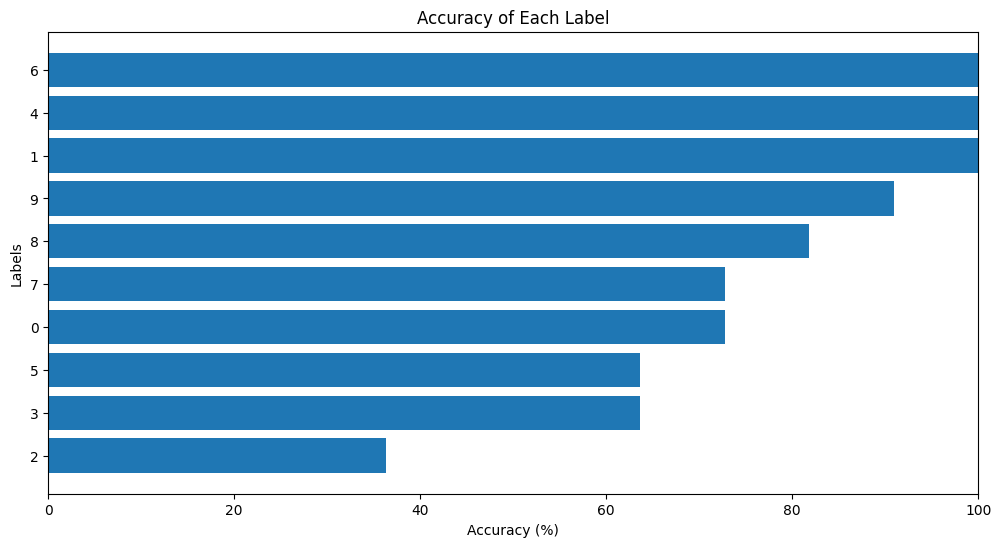

In [74]:
# Create a bar chart showing accuracy rates
accuracy_chart(confmat_custom)